# **Multilayer Perceptrons Limits in image processing**

**Spatial Relationships:** MLPs don't capture spatial relationships well in images due to the absence of convolutional layers.

**Fixed Input Sizes:** They require fixed-size inputs, making them less flexible for images of varying dimensions.

**Scalability:** MLPs struggle to scale for large images, as they may require an excessively large number of parameters.

**Overfitting:** They are prone to overfitting when dealing with high-dimensional image data.

**Translation Invariance:** MLPs lack inherent translation invariance, which is crucial for recognizing objects in different positions.

**Inefficient Feature Extraction:** MLPs may not efficiently extract relevant features from raw pixel data.

**Data Augmentation Dependency:** They often require extensive data augmentation to perform well on image tasks.

**High Memory Usage:** Handling large images with MLPs can lead to high memory usage.

**Limited Interpretability:** MLPs may lack interpretability in understanding complex image features.

In [ ]:
url ="https://miro.medium.com/v2/resize:fit:1320/1*B0sePmoFVdwA013UtPVx7A.gif"
from IPython.display import Image
Image(url=url)

# **Convolutional Neural Networks**

##  **Architecture of Convolutional Neural Networks**

* Convolutional Neural Networks (popularized by [Yann Lecun](https://en.wikipedia.org/wiki/Yann_LeCun)) are mainly designed to learn and perform tasks involving images;

\\


* CNN architecture is made up with $3$ types of layers:
  * **Convolutions** : learn filters;
  * **Pooling**: summarize filtered/convolved images;  
  * **Fully Connected**: perform traditional MLP transformations.

\\

![](https://drive.google.com/uc?export=view&id=11OTV6VzUL5tbChjo9OEimrZc4l0PsdTQ)


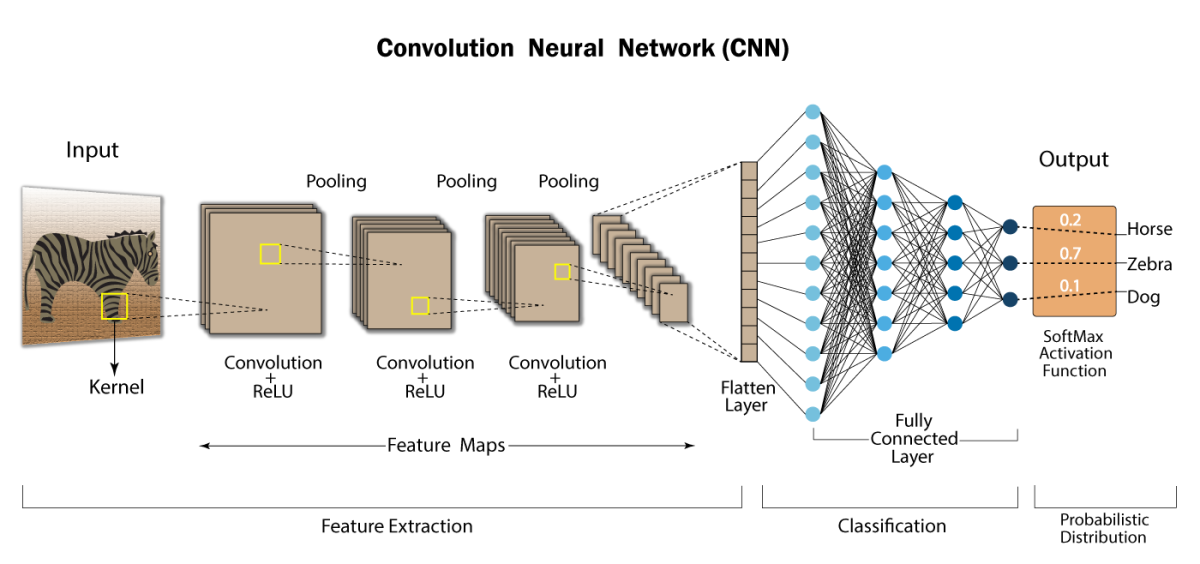

In [ ]:
url = "https://149695847.v2.pressablecdn.com/wp-content/uploads/2021/08/visual-transformers.gif"
from IPython.display import Image
Image(url=url)

### **Convolutions**

**Convolution Layer:** A convolution layer is a fundamental component in Convolutional Neural Networks (CNNs) used for feature extraction. It applies convolution operations to input data, such as images, to detect local patterns and features.

**Kernel (Filter):** Kernels are small, learnable matrices used in convolution layers. They slide or "convolve" across the input data to extract features. Each kernel detects specific patterns in the input.

**Stride:** The stride defines the step size at which the kernel moves across the input. It determines how much the output dimensions are reduced after convolution.

**Padding:** Padding involves adding extra border pixels to the input to maintain output dimensions. Padding helps preserve spatial information and control the reduction in feature map size.

**<center><h1>Kernel (Filter) illustration</h1></center>**

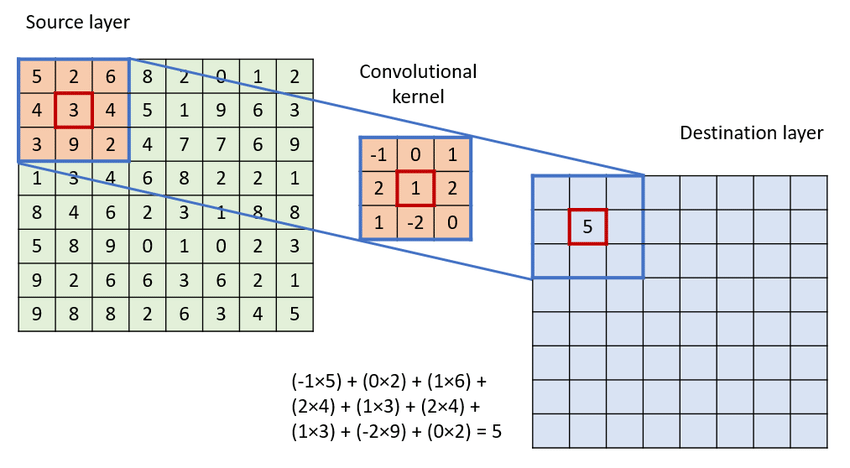

**<center><h1>Stride illustration</h1></center>**

In [ ]:
url = "https://miro.medium.com/v2/resize:fit:1400/0*kzJNmKrNvw5Np_-H.gif"

from IPython.display import Image
Image(url=url)

**<center><h1>Padding illustration</h1></center>**

In [ ]:
url = "https://www.michaelfxu.com/assets/gifs/neural_networks/cnn_convolve_with_padding.gif"

from IPython.display import Image
Image(url=url)

### **Pooling**

**Pooling Operation:**

**Definition:** Pooling is a down-sampling operation in CNNs that reduces the spatial dimensions (width and height) of feature maps, retaining the most important information.
Applications:

**Max Pooling:**

**Definition:** Max pooling selects the maximum value from a group of neighboring pixels or activations in a defined region (typically 2x2 or 3x3).<br>
**Application:** Max pooling helps preserve dominant features and reduces sensitivity to small translations or distortions in images, making it suitable for tasks like image classification.<br>
**Average Pooling:**

**Definition:** Average pooling calculates the average value of activations in a defined region.<br>
**Application:** Average pooling is useful for reducing spatial dimensions while providing a smoother representation of features, often used in tasks like object detection.<br>
**Global Average Pooling:**

**Definition:** Global average pooling computes the average of all activations in each feature map, resulting in a single value per feature map.<br>
**Application:** Global average pooling reduces the spatial dimensions to a single vector, often used as the final layer in CNNs before classification to reduce the number of parameters.<br>
**Min Pooling:**

**Definition:** Min pooling selects the minimum value from a group of neighboring pixels or activations.<br>
**Application:** Min pooling can be used for specific tasks, but it's less common than max and average pooling.<br>
**Fractional Pooling:**

**Definition:** Fractional pooling allows for non-integer down-sampling factors, providing more flexibility in feature map size reduction.<br>
**Application:** Fractional pooling can be advantageous when fine-grained control over down-sampling is needed.<br>
**Global Max Pooling:**

**Definition:** Global max pooling computes the maximum activation value across all positions in a feature map.<br>
**Application:** Global max pooling captures the most salient feature in each feature map, often used in neural network architectures like the Inception module.<br>
These pooling operations play a crucial role in reducing the spatial dimensions of feature maps, controlling overfitting, and extracting essential information from images in various computer vision tasks.






In [ ]:
url = "https://miro.medium.com/v2/resize:fit:1358/1*fXxDBsJ96FKEtMOa9vNgjA.gif"
from IPython.display import Image
Image(url=url)

### **Fully Connected**

In [ ]:
# See the first course in Deep Learning

# **Application of CNN in CIFAR-10 dataset**

**<center><h1>CREATE A CNN TO CLASSIFY CIFAR-10 DATASET</h1></center>**

In [ ]:
# Import packages
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load CIFAR-10 DATASET
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 12s 0us/step


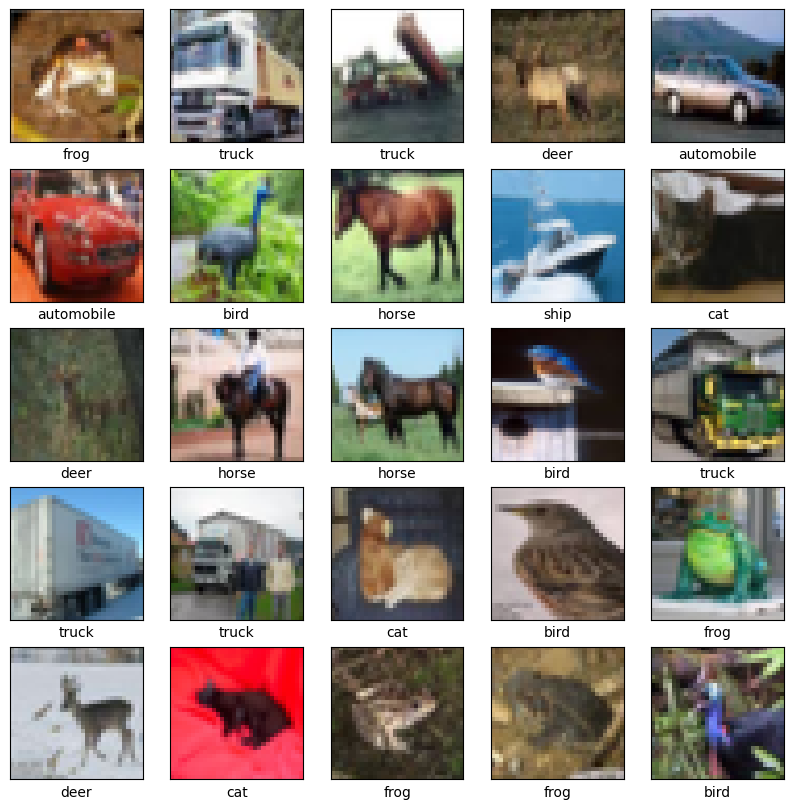

In [ ]:
# Visualization of the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [ ]:
# Normalize images
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
# Create our cnn
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [ ]:
# Define the loss, optimizer and metric
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Visualize model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 72s 113ms/step - loss: 1.6409 - accuracy: 0.3986 - val_loss: 1.5138 - val_accuracy: 0.4686
Epoch 2/10
625/625 [==============================] - 62s 99ms/step - loss: 1.3017 - accuracy: 0.5318 - val_loss: 1.2022 - val_accuracy: 0.5756
Epoch 3/10
625/625 [==============================] - 65s 104ms/step - loss: 1.1388 - accuracy: 0.5976 - val_loss: 1.0765 - val_accuracy: 0.6294
Epoch 4/10
625/625 [==============================] - 68s 109ms/step - loss: 1.0284 - accuracy: 0.6389 - val_loss: 1.0463 - val_accuracy: 0.6385
Epoch 5/10
625/625 [==============================] - 58s 93ms/step - loss: 0.9544 - accuracy: 0.6664 - val_loss: 1.0009 - val_accuracy: 0.6503
Epoch 6/10
625/625 [==============================] - 56s 89ms/step - loss: 0.8936 - accuracy: 0.6880 - val_loss: 0.9527 - val_accuracy: 0.6669
Epoch 7/10
625/625 [==============================] - 58s 92ms/step - loss: 0.8443 - accuracy: 0.7046 - val_loss: 0.9039 - val_accura

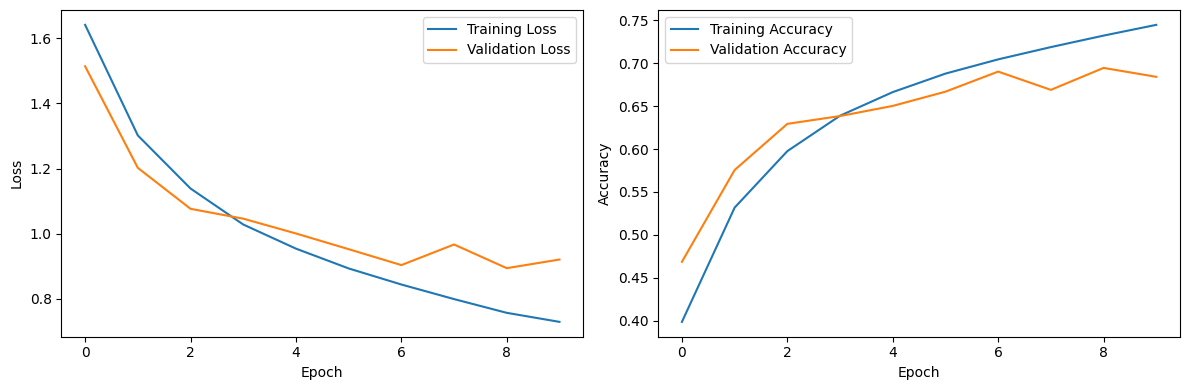

In [ ]:
# Evaluate the generalization of our model (gap between train and vaidation)

# Plot the loss and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot the accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Evaluate model in testset
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 4s 13ms/step - loss: 0.9246 - accuracy: 0.6887
Test accuracy: 0.6887000203132629


# **Transfer Learning**

**Transfer learning is a machine learning technique that leverages knowledge from one task or domain to improve performance on a related task or domain.**

**<center><h1>USE A PRE-TRAINED MODEL ResNet50 ON CIFAR-10 DATASET</h1></center>**

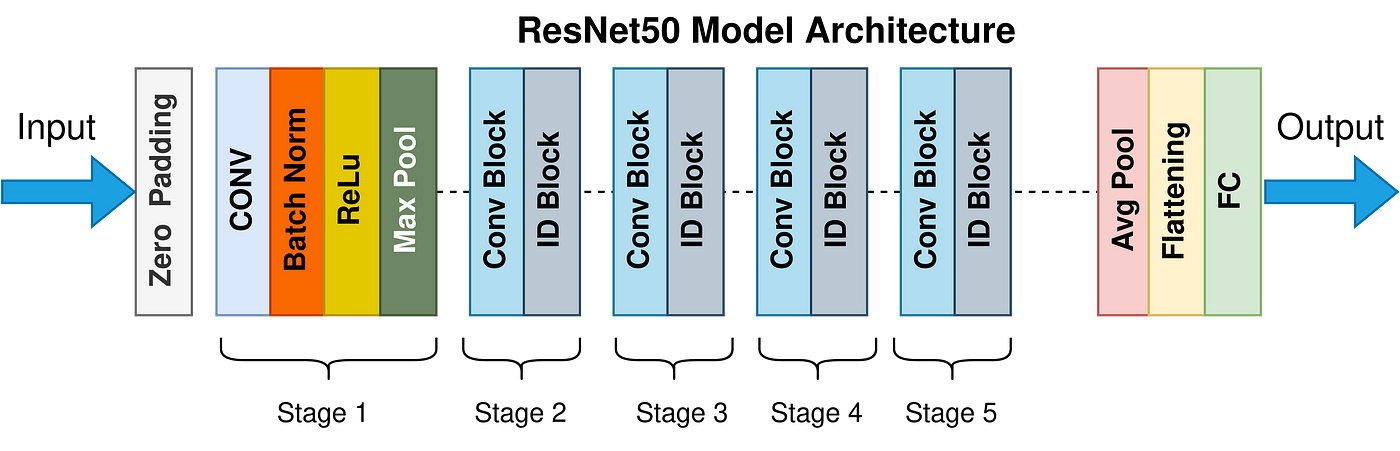

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.datasets import cifar10

In [ ]:

# Load the CIFAR-10 test data
(x_train,y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
# Preprocess the test data to match the input requirements of VGG16
x_test = preprocess_input(x_test)
x_train = preprocess_input(x_train)

In [ ]:
# Load Resnet
# Load the pretrained VGG16 model (without top classification layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.summary()

In [ ]:
resize_layer = tf.keras.layers.Input(shape=(32, 32, 3))
resized_images = tf.keras.layers.UpSampling2D(size=(7, 7))

# Load the ResNet50 model pre-trained on ImageNet data
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=resized_images)
# Freeze the weights of the base model
base_model.trainable = False

# Create your own classification head
model = tf.keras.Sequential([
    resize_layer,
    resized_images,
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_1  (None, 2048)              0         
 6 (GlobalAveragePooling2D)                                      
                                                                 
 dense_19 (Dense)            (None, 10)                20490     
                                                                 
Total params: 23608202 (90.06 MB)
Trainable params: 20490 (80.04 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
with tf.device('/GPU:0'):
    history = model.fit(x_train, y_train, epochs=1, batch_size=64, validation_split=0.2)

625/625 [==============================] - 146s 233ms/step - loss: 0.7454 - accuracy: 0.7428 - val_loss: 0.5948 - val_accuracy: 0.7928


In [ ]:
with tf.device('/GPU:0'):
    test_loss, test_accuracy = model.evaluate(x_test, y_test)
    print(f'Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}')

313/313 [==============================] - 30s 97ms/step - loss: 0.6074 - accuracy: 0.7898
Test loss: 0.6074, Test accuracy: 0.7898


# **TP**

1. Create a CNN on CIFAR-100 DATASET

2. Use a pretrained model to enhance the performance on CIFAR-100

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.datasets import cifar100
import matplotlib.pyplot as plt


In [ ]:
(x_train,y_train), (x_test, y_test) = cifar100.load_data()

In [ ]:
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

In [ ]:
pretrained_model = Xception(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3)
)
pretrained_model.trainable = False
pretrained_model.summary()

83683744/83683744 [==============================] - 1s 0us/step
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 111, 111, 32)         864       ['input_8[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 111, 111, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activat

In [ ]:
resize_layer = tf.keras.layers.Input(shape=(32, 32, 3))
resized_images = tf.keras.layers.UpSampling2D(size=(7, 7))

# Create your own classification head
model = tf.keras.Sequential([
    resize_layer,
    resized_images,
    pretrained_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(100, activation='softmax')
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 up_sampling2d_7 (UpSamplin  (None, 224, 224, 3)       0         
 g2D)                                                            
                                                                 
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d_6  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_6 (Dense)             (None, 100)               204900    
                                                                 
Total params: 21066380 (80.36 MB)
Trainable params: 204900 (800.39 KB)
Non-trainable params: 20861480 (79.58 MB)
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
with tf.device('/GPU:0'):
    history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 321s 423ms/step - loss: 1.1987 - accuracy: 0.6618 - val_loss: 1.3528 - val_accuracy: 0.6244
Epoch 2/5
625/625 [==============================] - 227s 363ms/step - loss: 1.0103 - accuracy: 0.7135 - val_loss: 1.3221 - val_accuracy: 0.6377
Epoch 3/5
625/625 [==============================] - 262s 419ms/step - loss: 0.8908 - accuracy: 0.7438 - val_loss: 1.3300 - val_accuracy: 0.6339
Epoch 4/5
625/625 [==============================] - 263s 421ms/step - loss: 0.7951 - accuracy: 0.7726 - val_loss: 1.3313 - val_accuracy: 0.6357
Epoch 5/5
625/625 [==============================] - 263s 422ms/step - loss: 0.7190 - accuracy: 0.7962 - val_loss: 1.3271 - val_accuracy: 0.6410


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 46s 146ms/step - loss: 1.3141 - accuracy: 0.6427


[1.314145565032959, 0.6427000164985657]

In [ ]:
# Save the model
model.save("xception_fine_tuned")

In [ ]:
# Load the saved model
model = tf.keras.models.load_model("xception_fine_tuned")

# **Object detection with kerasCV - RetinaNet**

**Single Shot MultiBox Detector (SSD):** SSD is a real-time object detection method that combines the localization capabilities of bounding box regression and the class prediction capabilities of a convolutional neural network (CNN). It is known for its speed and accuracy.

**Faster R-CNN:** Faster R-CNN is an extension of the popular R-CNN (Region-based Convolutional Neural Network) method. It introduces a Region Proposal Network (RPN) to generate potential object regions, followed by a CNN for classification and bounding box regression.

**YOLO (You Only Look Once):** YOLO is an efficient real-time object detection algorithm. YOLO divides an image into a grid and predicts bounding boxes and class probabilities directly from the grid cells. YOLO versions include YOLOv1, YOLOv2 (YOLO9000), YOLOv3, and YOLOv4.

**RetinaNet:** RetinaNet is designed to address the problem of class imbalance in object detection. It uses a feature pyramid network and a focal loss function to achieve accurate and efficient object detection.

**Mask R-CNN:** Mask R-CNN extends Faster R-CNN by adding a mask prediction branch, allowing for pixel-wise object segmentation in addition to bounding box detection and classification.

**Cascade R-CNN:** Cascade R-CNN is an enhancement of Faster R-CNN that uses a cascade of classifiers to improve object detection accuracy.

**EfficientDet:** EfficientDet is an efficient object detection architecture that balances model size, accuracy, and speed. It uses a compound scaling method to optimize model architecture.

**CenterNet:** CenterNet is an object detection method that directly predicts object centers and regresses the bounding box from these centers, simplifying the object detection process.

**DETR (Data-efficient Object Transformer):** DETR is a transformer-based object detection model that uses an encoder-decoder architecture to simultaneously predict object classes and bounding boxes.

**Sparse R-CNN:** Sparse R-CNN optimizes object detection for sparsely populated scenes, making it more efficient in scenarios with fewer objects.

**LSD (Lightweight and Simple Detection):** LSD is a lightweight object detection framework designed for resource-constrained environments.

**EfficientPS:** EfficientPS is a lightweight and efficient object detection framework based on anchor-free methods.

In [ ]:
# Install kerasCV
!pip install --upgrade -q git+https://github.com/keras-team/keras-cv


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 4.9 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import optimizers
import keras_cv
import numpy as np
from keras_cv import bounding_box
import os
import resource
from keras_cv import visualization
import tqdm

Using TensorFlow backend


In [ ]:
pretrained_model = keras_cv.models.RetinaNet.from_preset(
    "retinanet_resnet50_pascalvoc", bounding_box_format="xywh"
)

142662880/142662880 [==============================] - 6s 0us/step


In [ ]:
pretrained_model.summary()

Model: "retina_net"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 images (InputLayer)         [(None, None, None, 3)]      0         []                            
                                                                                                  
 model (Functional)          {'P3': (None, None, None,    2356115   ['images[0][0]']              
                             512),                        2                                       
                              'P4': (None, None, None,                                            
                             1024),                                                               
                              'P5': (None, None, None,                                            
                             2048)}                                                      

In [ ]:
filepath = tf.keras.utils.get_file(origin="https://www.petinsuranceaustralia.com.au/wp-content/uploads/2014/11/dog-and-cat-1170x777.jpg")
image = keras.utils.load_img(filepath)
image = np.array(image)



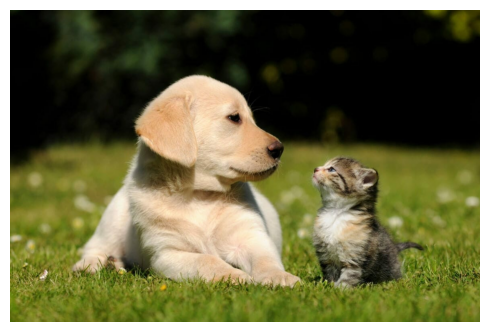

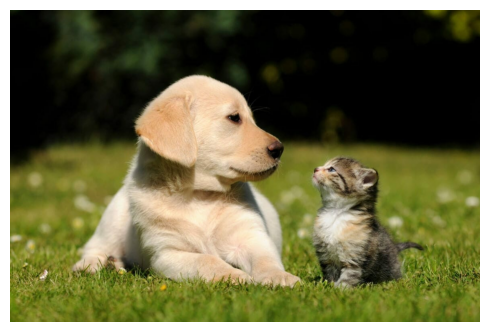

In [ ]:
visualization.plot_image_gallery(
    np.expand_dims(image, axis=0),
    value_range=(0, 255),
    rows=1,
    cols=1,
    scale=5,
)

In [ ]:
inference_resizing = keras_cv.layers.Resizing(
    640, 640, pad_to_aspect_ratio=True, bounding_box_format="xywh"
)
image_batch = inference_resizing([image])

In [ ]:
class_ids = [
    "Aeroplane",
    "Bicycle",
    "Bird",
    "Boat",
    "Bottle",
    "Bus",
    "Car",
    "Cat",
    "Chair",
    "Cow",
    "Dining Table",
    "Dog",
    "Horse",
    "Motorbike",
    "Person",
    "Potted Plant",
    "Sheep",
    "Sofa",
    "Train",
    "Tvmonitor",
    "Total",
]
class_mapping = dict(zip(range(len(class_ids)), class_ids))

In [ ]:
y_pred = pretrained_model.predict(image_batch)
y_pred

1/1 [==============================] - 39s 39s/step


{'boxes': array([[[ 82.95909,  95.22783, 299.06818, 281.46643],
         [403.36456, 202.02374, 161.22748, 178.53351],
         [ -1.     ,  -1.     ,  -1.     ,  -1.     ],
         [ -1.     ,  -1.     ,  -1.     ,  -1.     ],
         [ -1.     ,  -1.     ,  -1.     ,  -1.     ],
         [ -1.     ,  -1.     ,  -1.     ,  -1.     ],
         [ -1.     ,  -1.     ,  -1.     ,  -1.     ],
         [ -1.     ,  -1.     ,  -1.     ,  -1.     ],
         [ -1.     ,  -1.     ,  -1.     ,  -1.     ],
         [ -1.     ,  -1.     ,  -1.     ,  -1.     ],
         [ -1.     ,  -1.     ,  -1.     ,  -1.     ],
         [ -1.     ,  -1.     ,  -1.     ,  -1.     ],
         [ -1.     ,  -1.     ,  -1.     ,  -1.     ],
         [ -1.     ,  -1.     ,  -1.     ,  -1.     ],
         [ -1.     ,  -1.     ,  -1.     ,  -1.     ],
         [ -1.     ,  -1.     ,  -1.     ,  -1.     ],
         [ -1.     ,  -1.     ,  -1.     ,  -1.     ],
         [ -1.     ,  -1.     ,  -1.     ,  -1.     ],
 

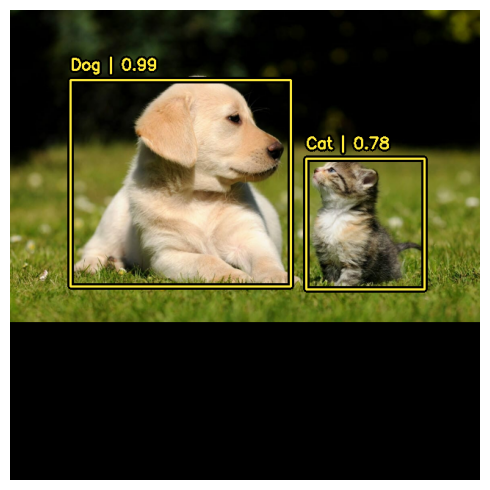

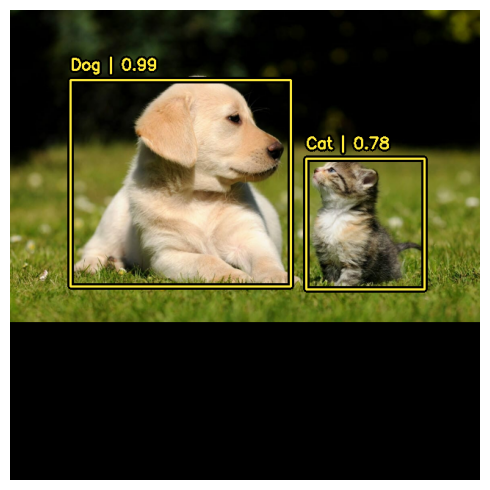

In [ ]:
visualization.plot_bounding_box_gallery(
    image_batch,
    value_range=(0, 255),
    rows=1,
    cols=1,
    y_pred=y_pred,
    scale=5,
    font_scale=0.7,
    bounding_box_format="xywh",
    class_mapping=class_mapping,
)

**EXERCISE: Fine-tune YOLOV8Detector class in https://keras.io/api/keras_cv/models/tasks/**

# **Object detection with kerasCV - YOLO**

In [ ]:
# Install kerasCV
!pip install --upgrade -q git+https://github.com/keras-team/keras-cv


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 4.9 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import optimizers
import keras_cv
import numpy as np
from keras_cv import bounding_box
import os
import resource
from keras_cv import visualization
import tqdm

Using TensorFlow backend


In [ ]:
pretrained_model = keras_cv.models.YOLOV8Detector.from_preset(
     "yolo_v8_m_pascalvoc", num_classes=20, bounding_box_format="xywh"
)

In [ ]:
pretrained_model.summary()

In [ ]:
filepath = tf.keras.utils.get_file(origin="https://www.petinsuranceaustralia.com.au/wp-content/uploads/2014/11/dog-and-cat-1170x777.jpg")
image = keras.utils.load_img(filepath)
image = np.array(image)



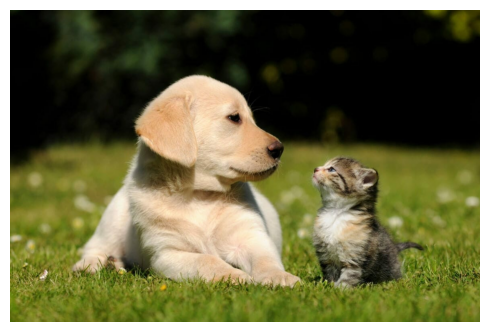

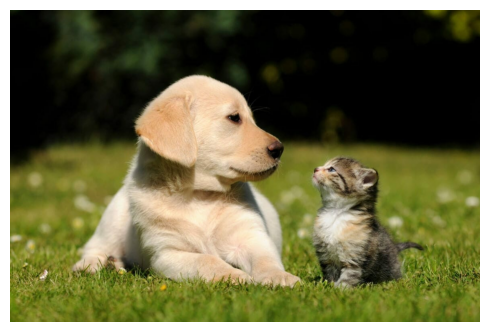

In [ ]:
visualization.plot_image_gallery(
    np.expand_dims(image, axis=0),
    value_range=(0, 255),
    rows=1,
    cols=1,
    scale=5,
)

In [ ]:
inference_resizing = keras_cv.layers.Resizing(
    640, 640, pad_to_aspect_ratio=True, bounding_box_format="xywh"
)
image_batch = inference_resizing([image])

In [ ]:
class_ids = [
    "Aeroplane",
    "Bicycle",
    "Bird",
    "Boat",
    "Bottle",
    "Bus",
    "Car",
    "Cat",
    "Chair",
    "Cow",
    "Dining Table",
    "Dog",
    "Horse",
    "Motorbike",
    "Person",
    "Potted Plant",
    "Sheep",
    "Sofa",
    "Train",
    "Tvmonitor",
    "Total",
]
class_mapping = dict(zip(range(len(class_ids)), class_ids))

In [ ]:
y_pred = model.predict(image_batch)
y_pred

In [ ]:
visualization.plot_bounding_box_gallery(
    image_batch,
    value_range=(0, 255),
    rows=1,
    cols=1,
    y_pred=y_pred,
    scale=5,
    font_scale=0.7,
    bounding_box_format="xywh",
    class_mapping=class_mapping,
)
